In [1]:
import numpy as np
import matplotlib.pyplot as plt
from xwp.exact_1d import exact_prop_numba
from xwp.spectral_1d import propTF

In [2]:
wavel = 0.5*10**(-6)
pi = np.pi
z = 100
N = 1000
L_in  = 5e-1

in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1

sampling = in_domain_exact[1] - in_domain_exact[0]
critical = (wavel*z/L_in)
if sampling>critical:
    print('Use TF')
else :
    print('Use IR')
print('Fresnel Number :', (L_in**2)/(wavel*z))

Use TF
Fresnel Number : 5000.0


In [3]:
out_,L_ = propTF(in_wave,L_in/N,L_in,wavel,z)
out_domain_ = np.linspace(-L_/2,L_/2,N)

In [4]:
N = 5000
in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
out_wave_exact = np.zeros((N),dtype='complex128')
out_domain_exact  = np.linspace(-L_/2,L_/2,N)

exact_prop_numba(in_wave,out_wave_exact,L_in,L_,wavel,z)

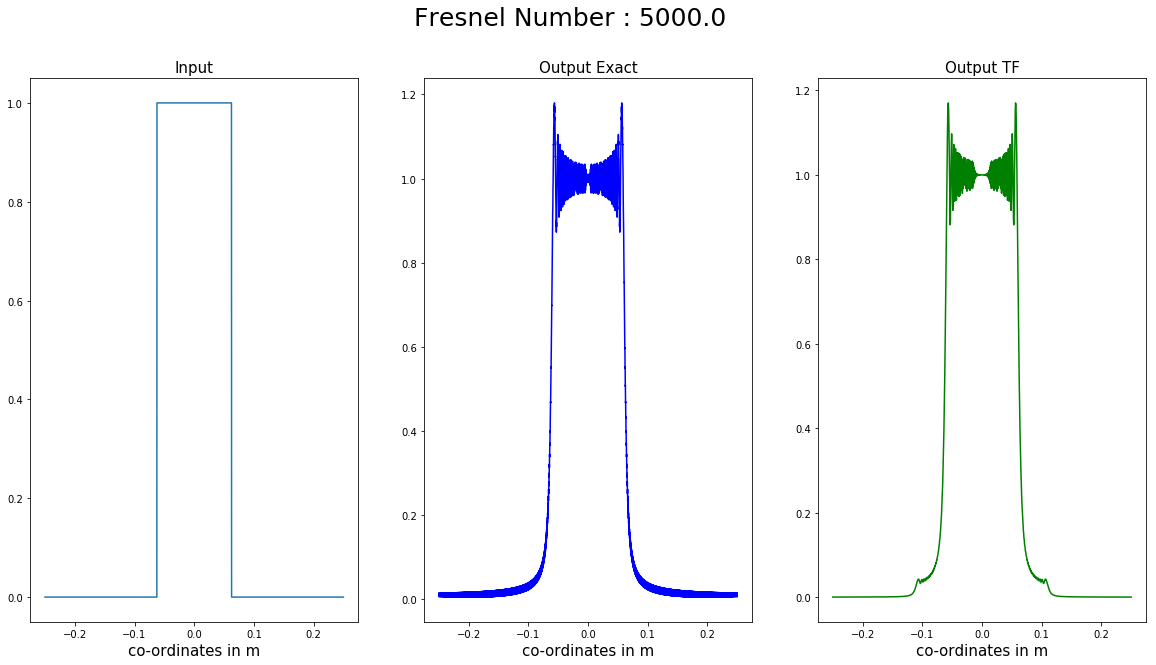

In [5]:
f, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(in_domain_exact,np.abs(in_wave))
ax1.set_xlabel('co-ordinates in m',fontsize = 15)
ax1.set_title('Input', fontsize = 15)
ax2.plot(out_domain_exact,np.abs(out_wave_exact),'b')
ax2.set_xlabel('co-ordinates in m',fontsize = 15)
ax2.set_title('Output Exact', fontsize = 15)
ax3.plot(out_domain_,np.abs(out_),'g')
ax3.set_xlabel('co-ordinates in m',fontsize = 15)
ax3.set_title('Output TF', fontsize = 15)
f.set_size_inches(20, 10, forward=True)
f.suptitle('Fresnel Number : '+str((L_in**2)/(wavel*z)),fontsize = 25)
plt.show()

In [6]:
%timeit exact_prop_numba(in_wave,out_wave_exact,L_in,L_,wavel,z)

254 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
